In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("abalone.csv")

In [7]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.sample(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1809,F,0.64,0.475,0.140,1.0725,0.4895,0.2295,0.3100,8
719,I,0.15,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
4118,M,0.65,0.525,0.185,1.3455,0.5860,0.2780,0.3865,9


In [5]:
df.tail(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [6]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
df.shape

(4177, 9)

In [9]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
df=pd.DataFrame(data=df)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [13]:
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

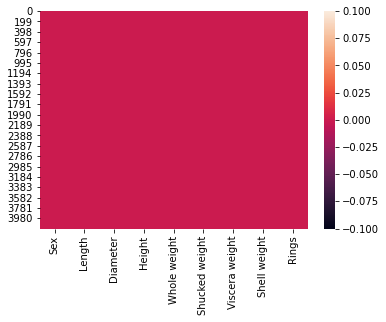

In [14]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

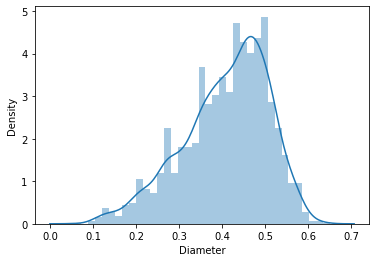

In [15]:
sns.distplot(df['Diameter'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

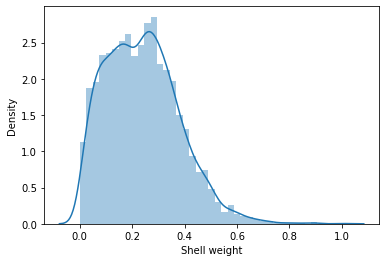

In [16]:
sns.distplot(df['Shell weight'])

In [17]:
df.iloc[:,0]

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [18]:
lencode=LabelEncoder()

In [19]:
df['Sex']=lencode.fit_transform(df['Sex'])

In [20]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<AxesSubplot:xlabel='Height', ylabel='Density'>

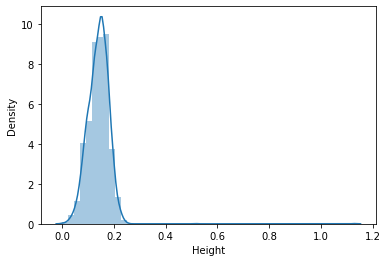

In [21]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

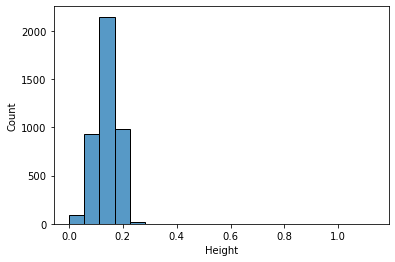

In [22]:
sns.histplot(df['Height'],bins=20)

In [23]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

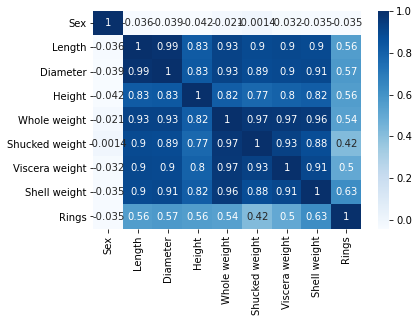

In [24]:
sns.heatmap(df.corr(),cmap="Blues",annot=True)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
x=df.iloc[:,0:-1]

In [27]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [28]:
x.shape

(4177, 8)

In [29]:
x.shape[1]

8

In [30]:
y=df.iloc[:,-1]

In [31]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [32]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [33]:
vif_calc()

   VIF Factor        features
0    2.555356             Sex
1  700.488988          Length
2  749.121626        Diameter
3   42.128924          Height
4  421.652484    Whole weight
5  101.674946  Shucked weight
6   63.585627  Viscera weight
7   81.873737    Shell weight


In [34]:
df.drop(['Length','Shucked weight'],axis=1,inplace=True)

In [35]:
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [37]:
x=df.iloc[:,:-1]


In [38]:
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.1500
1,2,0.265,0.090,0.2255,0.0485,0.0700
2,0,0.420,0.135,0.6770,0.1415,0.2100
3,2,0.365,0.125,0.5160,0.1140,0.1550
4,1,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490
4173,2,0.440,0.135,0.9660,0.2145,0.2605
4174,2,0.475,0.205,1.1760,0.2875,0.3080
4175,0,0.485,0.150,1.0945,0.2610,0.2960


In [39]:
x.shape

(4177, 6)

In [40]:
vif_calc()

   VIF Factor        features
0    2.532536             Sex
1   46.978990        Diameter
2   41.650431          Height
3  123.993316    Whole weight
4   59.292682  Viscera weight
5   49.403495    Shell weight


<AxesSubplot:>

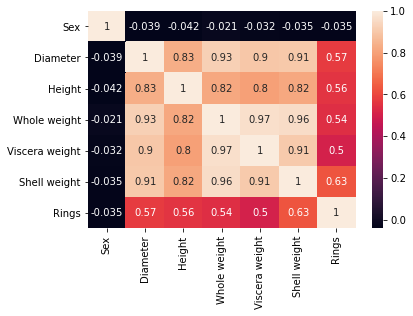

In [41]:
sns.heatmap(df.corr(),annot=True)

In [42]:
x=df.iloc[:,0:-1]

In [43]:
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.1500
1,2,0.265,0.090,0.2255,0.0485,0.0700
2,0,0.420,0.135,0.6770,0.1415,0.2100
3,2,0.365,0.125,0.5160,0.1140,0.1550
4,1,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490
4173,2,0.440,0.135,0.9660,0.2145,0.2605
4174,2,0.475,0.205,1.1760,0.2875,0.3080
4175,0,0.485,0.150,1.0945,0.2610,0.2960


In [44]:
x.shape

(4177, 6)

In [45]:
y.shape

(4177,)

In [46]:
scale=StandardScaler()

In [47]:
x=scale.fit_transform(x)

In [48]:
x

array([[ 1.15198011, -0.43214879, -1.06442415, -0.64189823, -0.72621157,
        -0.63821689],
       [ 1.15198011, -1.439929  , -1.18397831, -1.23027711, -1.20522124,
        -1.21298732],
       [-1.28068972,  0.12213032, -0.10799087, -0.30946926, -0.35668983,
        -0.20713907],
       ...,
       [ 1.15198011,  0.67640943,  1.56576738,  0.70821206,  0.97541324,
         0.49695471],
       [-1.28068972,  0.77718745,  0.25067161,  0.54199757,  0.73362741,
         0.41073914],
       [ 1.15198011,  1.48263359,  1.32665906,  2.28368063,  1.78744868,
         1.84048058]])

In [49]:
x.shape

(4177, 6)

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=55)

In [51]:
xtrain.shape

(2923, 6)

In [52]:
ytrain.shape

(2923,)

In [53]:
xtest.shape

(1254, 6)

In [54]:
ytest.shape

(1254,)

In [56]:
lr=LinearRegression()


In [57]:
lr.fit(xtrain,ytrain)


LinearRegression()

In [58]:
lr.coef_

array([ 0.01570564,  0.90236923,  0.44997775, -2.65910799, -0.2842277 ,
        3.66554767])